# Dataset

In [ ]:
!wget https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/re8.csv

--2023-01-10 20:21:12--  https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/re8.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4649304 (4.4M) [text/plain]
Saving to: ‘re8.csv’

re8.csv             100%[===================>]   4.43M  --.-KB/s    in 0.03s   

2023-01-10 20:21:13 (158 MB/s) - ‘re8.csv’ saved [4649304/4649304]



In [ ]:
!pip install git+https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git@feature-information

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git (to revision feature-information) to /tmp/pip-req-build-c6eje3jg
  Running command git clone --filter=blob:none --quiet https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git /tmp/pip-req-build-c6eje3jg
  Running command git checkout -b feature-information --track origin/feature-information
  Switched to a new branch 'feature-information'
  Branch 'feature-information' set up to track remote branch 'feature-information' from 'origin'.
  Resolved https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git to commit 2bc0f516e4bfbca683eb0102dff23c42fa8d398b
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/AlvaroJoseLopes/graph-walker to /tmp/pip-install-0zexn781/graph-walker_073bb1ac421344b185faa3c40598e662
  Running command git clone --filter=blob:none --quiet https://github.com/AlvaroJoseL

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

def evaluate(df_embed, labels):
    # avaliando com clustering
    # kmeans = KMeans(n_clusters=len(np.unique(labels)), random_state=0).fit(df_emb_train)
    # kmeans.labels_
    # print('---> DeepWalk Transformers (clustering): ', normalized_mutual_info_score(kmeans.labels_, labels))

    # avaliando com classificacao
    print("\n\n\n---> DeepWalk Transformers (classification)")
    clf_train, clf_test, clf_train_y, clf_test_y  = train_test_split(df_embed, labels, test_size=0.3, random_state=42)
    clf = LinearSVC()
    clf.fit(clf_train, clf_train_y)
    print(classification_report(clf_test_y, clf.predict(clf_test)))

In [ ]:
import pandas as pd 

df = pd.read_csv('re8.csv')
df

,file_name,text,class
0,acq.4342.txt,mcdowell me to merger with interpharm inc mcdo...,acq
1,acq.5302.txt,intermagnetics general inma completes buy inte...,acq
2,acq.8530.txt,tesco extends hillards offer tesco plc tsco l ...,acq
3,acq.3841.txt,healthvest hvt sells shares healthvest a maryl...,acq
4,acq.6302.txt,cooper canada said it received takeover offers...,acq
...,...,...,...
7669,trade.1829.txt,japan will not retaliate now against u s tarif...,trade
7670,trade.4403.txt,koreans to buy billion dlrs in u s goods south...,trade
7671,trade.6944.txt,belgolux trade swings into january deficit the...,trade
7672,trade.7420.txt,nakasone to visit washington in late april pri...,trade


In [ ]:
df['label'] = df['class'].astype('category').cat.codes
df

,file_name,text,class,label
0,acq.4342.txt,mcdowell me to merger with interpharm inc mcdo...,acq,0
1,acq.5302.txt,intermagnetics general inma completes buy inte...,acq,0
2,acq.8530.txt,tesco extends hillards offer tesco plc tsco l ...,acq,0
3,acq.3841.txt,healthvest hvt sells shares healthvest a maryl...,acq,0
4,acq.6302.txt,cooper canada said it received takeover offers...,acq,0
...,...,...,...,...
7669,trade.1829.txt,japan will not retaliate now against u s tarif...,trade,7
7670,trade.4403.txt,koreans to buy billion dlrs in u s goods south...,trade,7
7671,trade.6944.txt,belgolux trade swings into january deficit the...,trade,7
7672,trade.7420.txt,nakasone to visit washington in late april pri...,trade,7


In [ ]:
df = df.sample(frac=0.3).reset_index(drop=True)
df

,file_name,text,class,label
0,acq.5865.txt,bevis industries seeks buyer for company bevis...,acq,0
1,earn.7292.txt,knight ridder inc krn sets quarterly qtly div ...,earn,2
2,earn.1767.txt,oakite products inc okt st qtr net shr cts vs ...,earn,2
3,acq.2954.txt,henley group said it ended talks on buying sou...,acq,0
4,acq.8169.txt,e f hutton efh extends purolator pcc offer e f...,acq,0
...,...,...,...,...
2297,earn.5559.txt,campbell resources inc cch nd qtr dec net shr ...,earn,2
2298,earn.4628.txt,gevaert nv gevn br year consolidated group net...,earn,2
2299,earn.5529.txt,scurry rainbow oil ltd st qtr dec net shr cts ...,earn,2
2300,acq.3932.txt,comdata cdn in merger agreement comdata networ...,acq,0


In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=bbc24899ba35f04d275f69aa957888f5c1339c7829ad1c5f2ebac7adb055c8d1
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Will be used as feature information later
embeddings = model.encode(df.text.to_list())


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
df['embeddings'] = list(embeddings)
df

,file_name,text,class,label,embeddings
0,acq.5865.txt,bevis industries seeks buyer for company bevis...,acq,0,"[-0.053162947, 0.18337327, 0.041400958, 0.1435..."
1,earn.7292.txt,knight ridder inc krn sets quarterly qtly div ...,earn,2,"[-0.11494746, -0.17972776, 0.23166628, -0.2992..."
2,earn.1767.txt,oakite products inc okt st qtr net shr cts vs ...,earn,2,"[-0.26515746, -0.33154288, -0.023759047, 0.141..."
3,acq.2954.txt,henley group said it ended talks on buying sou...,acq,0,"[0.29731077, -0.098796576, 0.8446369, -0.07186..."
4,acq.8169.txt,e f hutton efh extends purolator pcc offer e f...,acq,0,"[-0.13505912, -0.21692762, -0.02766729, -0.376..."
...,...,...,...,...,...
2297,earn.5559.txt,campbell resources inc cch nd qtr dec net shr ...,earn,2,"[-0.5525738, -0.5588546, -0.24406126, 0.219386..."
2298,earn.4628.txt,gevaert nv gevn br year consolidated group net...,earn,2,"[-0.10545115, 0.18899873, -0.12169291, -0.3091..."
2299,earn.5529.txt,scurry rainbow oil ltd st qtr dec net shr cts ...,earn,2,"[-0.61814433, -0.2714392, -0.09187404, 0.00526..."
2300,acq.3932.txt,comdata cdn in merger agreement comdata networ...,acq,0,"[-0.2815886, -0.47201613, -0.1713328, -0.29068..."


# Building a example graph

In [ ]:
from sklearn.neighbors import kneighbors_graph
import numpy as np
A = kneighbors_graph(np.array(df['embeddings'].to_list()), n_neighbors=5, metric="cosine")

In [ ]:
import networkx as nx 
G = nx.Graph(A)

In [ ]:
G.number_of_nodes()

2302

# Using the API

In [ ]:
num_walks = 50
walk_len = 10
embed_dim = 32
mask_rate = 0.5
batch_size = 128
epochs = 5
lr = 0.0001

## Without Feature Information

In [ ]:
from deep_walk_transformers.deep_walk_transformers import DeepWalkTransformers
dwt = DeepWalkTransformers(
    num_walks,
    walk_len,
    mask_rate,
    embed_dim
)
dwt.fit(G, batch_size=batch_size, epochs=epochs, lr=lr)

Random walks - T=0.09s
Walks shape: (115100, 10)


/usr/local/lib/python3.8/dist-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Building X_paths and X_positions:   0%|          | 0/115100 [00:00<?, ?it/s]

Getting Vectorize Layer ...
Encoding texts ...
Getting masked input (mask token id = 2304) ...
Building Masked Language Bert Model ...
([<KerasTensor: shape=(None, 10) dtype=int64 (created by layer 'input_11')>, <KerasTensor: shape=(None, 10) dtype=int64 (created by layer 'input_12')>], <KerasTensor: shape=(None, 10, 2302) dtype=float32 (created by layer 'mlm_cls')>)
{'has_feature': False, 'name': 'masked_bert_model'}
Fake Training MLM model ... 
Epoch 1/5
eh pra entrar aqui!!!
eh pra entrar aqui!!!
900/900 [==============================] - 8s 8ms/step - loss: 7.7265
Epoch 2/5
900/900 [==============================] - 7s 8ms/step - loss: 7.6895
Epoch 3/5
900/900 [==============================] - 7s 8ms/step - loss: 7.6641
Epoch 4/5
900/900 [==============================] - 7s 8ms/step - loss: 7.6479
Epoch 5/5
900/900 [==============================] - 8s 9ms/step - loss: 7.6378


In [ ]:
node_embeddings = dwt.get_transductive_embeddings()
df_embed = pd.DataFrame.from_dict(node_embeddings, orient='index')

3597/3597 [==============================] - 10s 3ms/step


In [ ]:
df_embed.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-1.003295,-1.027686,1.317051,-1.184469,0.834647,0.315095,-0.758179,0.809563,-0.906939,1.430442,...,-1.351863,0.911537,-1.408589,-0.448466,-1.293646,0.670923,0.233246,0.066092,0.365923,0.958801
1,-0.647537,-0.890141,1.169082,-0.925655,0.821734,0.470174,-1.059852,1.066342,-0.997731,1.169350,...,-1.133501,1.022262,-1.427512,-0.487478,-1.453692,0.775035,0.192997,-0.071875,0.380423,1.164509
2,-0.943678,-1.075311,1.376611,-1.158704,0.857019,0.295804,-0.890687,0.864716,-0.921948,1.456467,...,-1.294659,0.798817,-1.372461,-0.439327,-1.226673,0.747201,0.158103,0.122283,0.292785,1.085930
3,-1.133631,-0.753220,1.215624,-1.103224,0.891452,0.217516,-0.816558,0.686719,-0.918242,1.315713,...,-1.221725,0.765621,-1.375942,-0.344114,-1.291470,0.908130,0.188875,0.034161,0.376305,0.986509
4,-1.004182,-0.857798,1.149921,-1.073539,0.743534,0.434748,-0.941668,0.932365,-0.982403,1.360898,...,-1.272699,0.866662,-1.300987,-0.408249,-1.368242,0.778463,0.179312,0.088174,0.352377,0.973715


In [ ]:
df_embed.shape

(2302, 32)

In [ ]:
evaluate(df_embed, df.label.to_list())




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.45      0.39      0.42       213
           1       0.00      0.00      0.00        35
           2       0.55      0.80      0.65       337
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        25
           5       0.09      0.04      0.05        28
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        36

    accuracy                           0.51       691
   macro avg       0.14      0.15      0.14       691
weighted avg       0.41      0.51      0.45       691



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

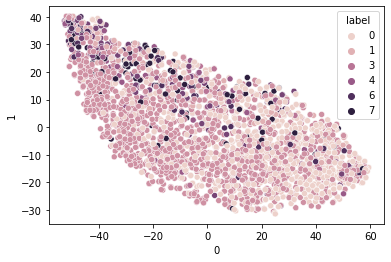

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = df.label.to_list()
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")

## With Feature Information

In [ ]:
from deep_walk_transformers.deep_walk_transformers import DeepWalkTransformers
dwt = DeepWalkTransformers(
    num_walks,
    walk_len,
    mask_rate,
    embed_dim
)
dwt.fit(G, features=embeddings, batch_size=batch_size, epochs=epochs, lr=lr)

Random walks - T=0.09s
Walks shape: (115100, 10)


/usr/local/lib/python3.8/dist-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Building X_paths and X_positions:   0%|          | 0/115100 [00:00<?, ?it/s]

Getting Vectorize Layer ...
Encoding texts ...
Getting masked input (mask token id = 2304) ...
Building Masked Language Bert Model ...
([<KerasTensor: shape=(None, 10) dtype=int64 (created by layer 'input_5')>, <KerasTensor: shape=(None, 10) dtype=int64 (created by layer 'input_6')>, <KerasTensor: shape=(None, 384) dtype=int64 (created by layer 'input_7')>], <KerasTensor: shape=(None, 10, 2302) dtype=float32 (created by layer 'mlm_cls')>)
{'has_feature': True, 'name': 'masked_bert_model'}
Fake Training MLM model ... 
Epoch 1/5
eh pra entrar aqui!!!
eh pra entrar aqui!!!
900/900 [==============================] - 8s 8ms/step - loss: 7.7267
Epoch 2/5
900/900 [==============================] - 7s 8ms/step - loss: 7.6881
Epoch 3/5
900/900 [==============================] - 7s 8ms/step - loss: 7.6597
Epoch 4/5
900/900 [==============================] - 7s 8ms/step - loss: 7.6401
Epoch 5/5
900/900 [==============================] - 8s 9ms/step - loss: 7.6279


In [ ]:
node_embeddings = dwt.get_transductive_embeddings()
df_embed = pd.DataFrame.from_dict(node_embeddings, orient='index')

3597/3597 [==============================] - 10s 3ms/step


In [ ]:
df_embed.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.718843,-1.138046,0.921197,-0.711864,1.082500,0.501672,-0.551528,1.078423,-1.094604,1.115011,...,-1.016759,1.519704,-1.257766,1.240559,-1.265553,0.538842,-0.054575,1.102043,-1.402593,0.938122
1,-0.024549,-1.283565,0.273100,-0.047917,1.071255,0.878870,-0.938820,1.129101,-1.096970,1.100453,...,-0.890710,1.233985,-1.416260,1.323211,-1.125015,0.564324,0.085059,1.253038,-1.270923,0.867231
2,-0.012151,-1.264154,0.394631,-0.130755,0.936299,0.964981,-0.838714,1.274031,-1.022836,1.251615,...,-0.717952,1.348335,-1.295304,1.391654,-1.132545,0.623402,-0.084188,1.445573,-1.403788,1.001184
3,-0.475737,-1.011337,0.805326,-0.478837,1.058004,0.582717,-0.413017,1.080128,-1.170010,1.144213,...,-1.234605,1.447361,-0.991334,1.249936,-1.281165,0.608002,-0.245626,1.195157,-1.319600,0.975358
4,-0.278660,-0.920579,0.302066,-0.050970,1.034860,0.909123,-0.505663,1.295425,-1.152881,1.035992,...,-0.823879,1.219541,-1.468113,1.176321,-1.172680,0.330269,0.059664,1.230690,-1.414008,1.157902


In [ ]:
evaluate(df_embed, df.label.to_list())




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.52      0.49      0.51       213
           1       0.11      0.03      0.05        35
           2       0.59      0.83      0.69       337
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        25
           5       0.29      0.07      0.11        28
           6       1.00      0.10      0.18        10
           7       0.00      0.00      0.00        36

    accuracy                           0.56       691
   macro avg       0.31      0.19      0.19       691
weighted avg       0.48      0.56      0.50       691



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

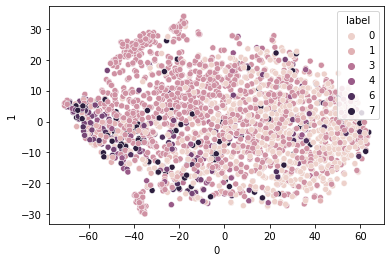

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = df.label.to_list()
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")